In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#Load cleaned dataset
df = pd.read_csv('/content/student_performance_cleaned_unique.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [4]:
summary_stats = df.describe()

In [5]:
gender_performance = df.groupby('gender')['average_score'].mean()
print(gender_performance)

gender
female    70.329404
male      66.248777
Name: average_score, dtype: float64


In [6]:
correlation_matrix = df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr()
print(correlation_matrix)

               math_score  reading_score  writing_score  average_score
math_score       1.000000       0.798881       0.780668       0.909336
reading_score    0.798881       1.000000       0.949844       0.967641
writing_score    0.780668       0.949844       1.000000       0.961814
average_score    0.909336       0.967641       0.961814       1.000000


In [7]:
male_scores = df[df['gender'] == 'male']['average_score']
female_scores = df[df['gender'] == 'female']['average_score']

In [9]:
t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)
print(f"T-test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-test Statistic: -4.8142
P-value: 0.0000


In [10]:
sns.set_style("whitegrid")

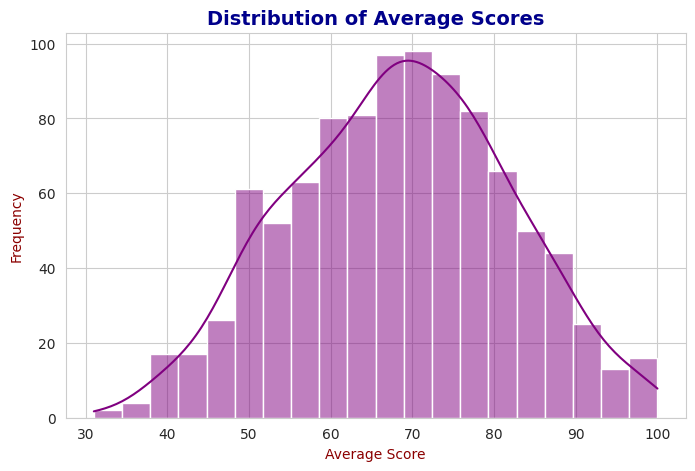

In [11]:
# 1. Histogram of Average Scores
plt.figure(figsize=(8, 5))
sns.histplot(df["average_score"], bins=20, kde=True, color="purple")
plt.title("Distribution of Average Scores", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Average Score", color="darkred")
plt.ylabel("Frequency", color="darkred")
plt.grid(True)
plt.show()

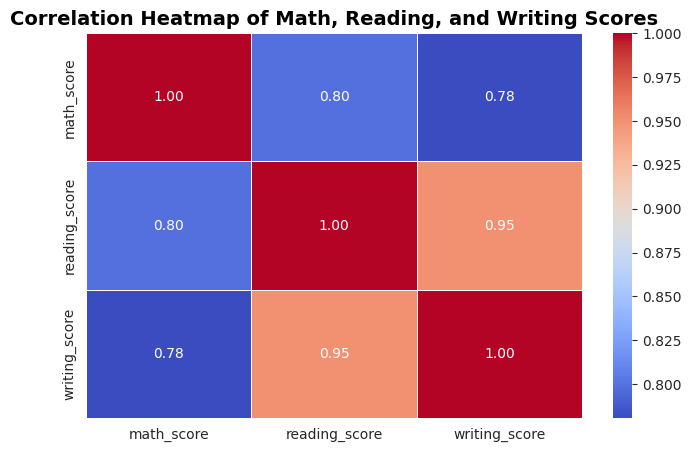

In [25]:
# 2. Correlation Heatmap of Scores
plt.figure(figsize=(8, 5))
correlation_matrix = df[["math_score", "reading_score", "writing_score"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Math, Reading, and Writing Scores", fontsize=14, fontweight="bold", color="black")
plt.grid(False)
plt.show()

<ipython-input-12-9f878b58f0e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["parental_level_of_education"], y=df["math_score"], palette="coolwarm")


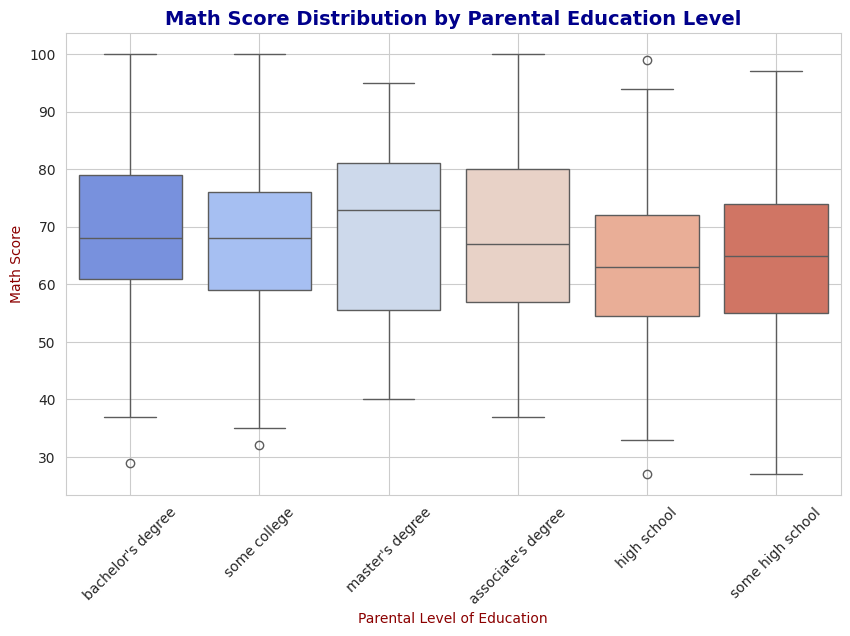

In [12]:
# 3. Boxplot of Math Scores by Parental Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["parental_level_of_education"], y=df["math_score"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Math Score Distribution by Parental Education Level", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Parental Level of Education", color="darkred")
plt.ylabel("Math Score", color="darkred")
plt.grid(True)
plt.show()

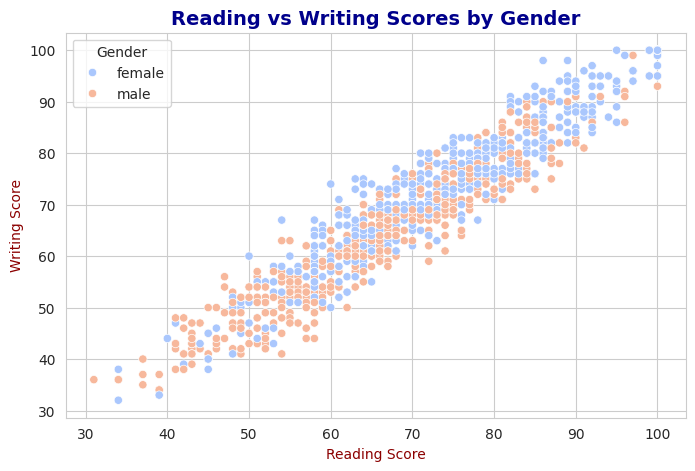

In [13]:
# 4. Scatter Plot of Reading vs Writing Scores by Gender
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["reading_score"], y=df["writing_score"], hue=df["gender"], palette="coolwarm", marker="o")
plt.title("Reading vs Writing Scores by Gender", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Reading Score", color="darkred")
plt.ylabel("Writing Score", color="darkred")
plt.legend(title="Gender", loc="upper left")
plt.grid(True)
plt.show()

<ipython-input-27-fc769fcc7f98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["lunch"], y=df["writing_score"], palette="coolwarm")


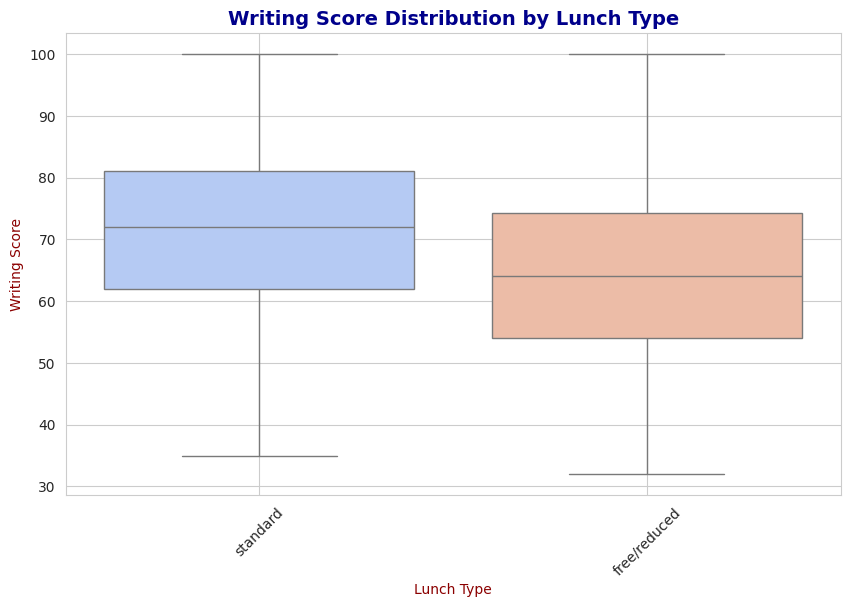

In [27]:
# 3. Boxplot of Writing Scores by Lunch Type
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["lunch"], y=df["writing_score"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Writing Score Distribution by Lunch Type", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Lunch Type", color="darkred")
plt.ylabel("Writing Score", color="darkred")
plt.grid(True)
plt.show()

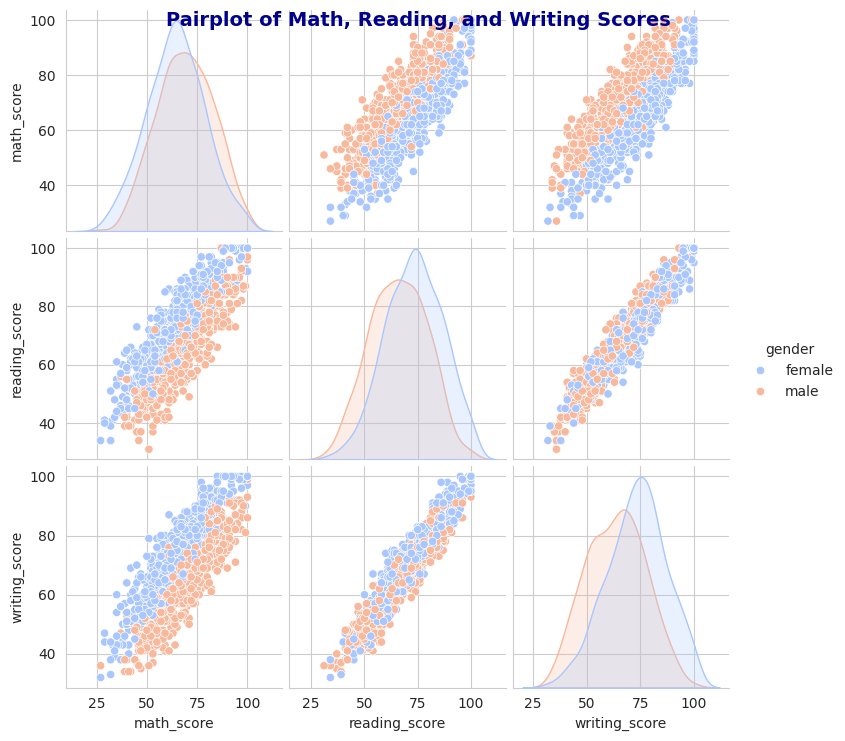

In [28]:

# 6. Pairplot of Math, Reading, and Writing Scores
sns.pairplot(df, vars=["math_score", "reading_score", "writing_score"], hue="gender", palette="coolwarm")
plt.suptitle("Pairplot of Math, Reading, and Writing Scores", fontsize=14, fontweight="bold", color="darkblue")
plt.show()